In [8]:
import gzip
import json

import numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
fl=gzip.open('goemotions.json.gz')
res=json.load(fl)
#test
print(res[0])

['That game hurt.', 'sadness', 'negative']


In [10]:
# e=np.array(res)[:,1]
# n,counts=np.unique(e,return_counts=True)
# counts=np.sort(counts)
# plt.figure(figsize=(15,25))
# plt.pie(np.array(counts))


In [11]:
df=pd.DataFrame(res,columns=["post","emotion","sentiment"])
emotions=df.drop(columns=['sentiment','post'])
sentiments=df.drop(columns=['emotion','post'])

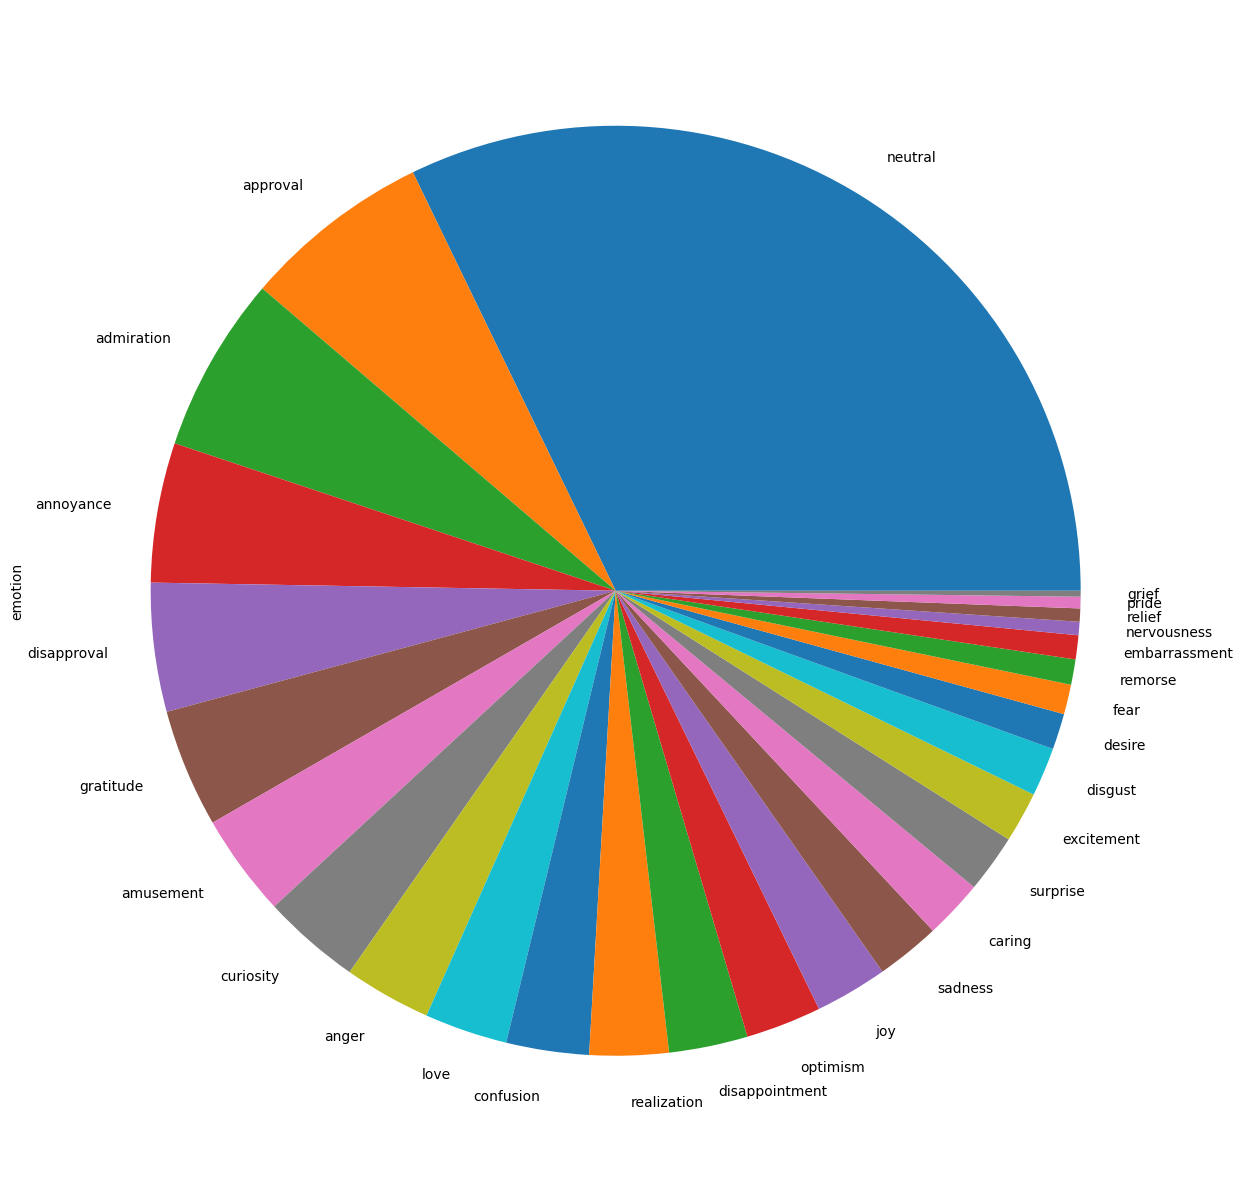

In [12]:
fig=emotions.emotion.value_counts().plot(kind="pie",figsize=(15,25)).get_figure()
fig.savefig("emotions.png")

In [13]:
posts=df.drop(columns=['emotion','sentiment'])

numpy_posts=posts.to_numpy().flatten()
numpy_emotions=emotions.to_numpy().flatten()
numpy_sentiments=sentiments.to_numpy().flatten()

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
x=vectorizer.fit_transform(numpy_posts)


In [15]:
vocab_count=len(vectorizer.get_feature_names_out())
print(len(vectorizer.vocabulary_))
print(vocab_count)

30449
30449


In [16]:
from sklearn.model_selection import train_test_split
X_train_emotion, X_test_emotion, y_train_emotion, y_test_emotion =train_test_split(x,numpy_emotions,test_size=0.2,train_size=0.8)

In [17]:
from sklearn.naive_bayes import MultinomialNB
classifier_emotion_nb = MultinomialNB()
model_emotion_nb=classifier_emotion_nb.fit(X_train_emotion,y_train_emotion)

In [18]:
X_train_sentiment, X_test_Sentiment, y_train_sentiment, y_test_sentiment =train_test_split(x,numpy_sentiments,test_size=0.2,train_size=0.8)


In [109]:
classifier_sentiment_nb=MultinomialNB()
model_sentiment_nb=classifier_sentiment_nb.fit(X_train_sentiment,y_train_sentiment)

In [84]:
from sklearn import tree
dt_emotion=tree.DecisionTreeClassifier()
dt_sentiment=tree.DecisionTreeClassifier()
dt_emotion.fit(X_train_emotion,y_train_emotion)
dt_sentiment.fit(X_train_sentiment,y_train_sentiment)

DecisionTreeClassifier()

In [96]:
print(dt_emotion.tree_.m)

1646


In [21]:
from sklearn.neural_network import MLPClassifier

neural_net_emotion=MLPClassifier().fit(X_train_emotion,y_train_emotion)


/Users/safwanahmed/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [22]:
neural_net_sentiment=MLPClassifier().fit(X_train_sentiment,y_train_sentiment)

In [6]:
from sklearn.metrics import confusion_matrix
import numpy as np
y_true= ["cat", "ant", "cat", "cat", "ant", "bird"]
y_pred= ["ant", "ant", "cat", "cat", "ant", "cat"]
con=confusion_matrix(y_true, y_pred, labels=["ant", "bird", "cat"])
np.savetxt('performance',con)

In [87]:
from sklearn.model_selection import GridSearchCV
param_grid = {"alpha": [0.5, 0, 2, 1,1.5]}
grid_Search_emotions=GridSearchCV(MultinomialNB(),param_grid)
grid_Search_emotions.fit(X_train_emotion, y_train_emotion)

/Users/safwanahmed/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/safwanahmed/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/safwanahmed/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/safwanahmed/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/safwanahmed/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in nu

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0.5, 0, 2, 1, 1.5]})

In [88]:
grid_Search_emotions.best_params_

{'alpha': 0.5}

In [89]:
from sklearn.model_selection import GridSearchCV
param_grid = {"alpha": [0.5, 0, 2, 1,1.5]}
grid_Search_sentiments=GridSearchCV(MultinomialNB(),param_grid)
grid_Search_sentiments.fit(X_train_sentiment, y_train_sentiment)

/Users/safwanahmed/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/safwanahmed/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/safwanahmed/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/safwanahmed/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/safwanahmed/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in nu

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0.5, 0, 2, 1, 1.5]})

In [90]:
grid_Search_sentiments.best_params_

{'alpha': 1}

In [116]:
classifier_emotion_cv_nb = MultinomialNB(alpha=0.5)
model_emotion_cv_nb=classifier_emotion_cv_nb.fit(X_train_emotion,y_train_emotion)
classifier_sentiment_cv_nb=MultinomialNB(alpha=1)
model_sentiment_cv_nb=classifier_sentiment_cv_nb.fit(X_train_sentiment,y_train_sentiment)

In [99]:
#DT
param_grid = {"criterion": ['gini','entropy'],
              "max_depth":[1100,800],
              "min_samples_split":[3,4]}


In [100]:
grid_Search_emotions_tree=GridSearchCV(tree.DecisionTreeClassifier(),param_grid)
grid_Search_emotions_tree.fit(X_train_emotion, y_train_emotion)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1100, 800],
                         'min_samples_split': [3, 4]})

In [101]:
grid_Search_sentiments_tree=GridSearchCV(tree.DecisionTreeClassifier(),param_grid)
grid_Search_sentiments_tree.fit(X_train_emotion, y_train_emotion)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1100, 800],
                         'min_samples_split': [3, 4]})

In [102]:
print(grid_Search_emotions_tree.best_params_)
print(grid_Search_sentiments_tree.best_params_)

{'criterion': 'gini', 'max_depth': 800, 'min_samples_split': 3}
{'criterion': 'gini', 'max_depth': 800, 'min_samples_split': 3}


In [107]:
classifier_emotion_cv_dt = tree.DecisionTreeClassifier(criterion='gini',max_depth=800,min_samples_split=3)
classifier_emotion_cv_dt.fit(X_train_emotion,y_train_emotion)
classifier_sentiment_cv_dt=tree.DecisionTreeClassifier(criterion='gini',max_depth=800,min_samples_split=3)
classifier_sentiment_cv_dt.fit(X_train_sentiment,y_train_sentiment)

DecisionTreeClassifier(max_depth=800, min_samples_split=3)

In [24]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [34]:
#base MLP_emotion
y_pred_emotion=neural_net_emotion.predict(X_test_emotion)
print(classification_report(y_test_emotion, y_pred_emotion))
con=confusion_matrix(y_pred_emotion,y_test_emotion)
# import pandas as pd
# np.savetxt('temp', con, fmt='%10.5f')

                precision    recall  f1-score   support

    admiration       0.51      0.45      0.48      2112
     amusement       0.47      0.50      0.49      1310
         anger       0.32      0.27      0.29      1019
     annoyance       0.19      0.16      0.17      1673
      approval       0.22      0.18      0.20      2198
        caring       0.25      0.23      0.24       682
     confusion       0.25      0.19      0.22       994
     curiosity       0.36      0.31      0.33      1179
        desire       0.22      0.24      0.23       468
disappointment       0.15      0.19      0.17       926
   disapproval       0.24      0.19      0.21      1533
       disgust       0.28      0.18      0.22       594
 embarrassment       0.25      0.16      0.20       289
    excitement       0.20      0.19      0.20       591
          fear       0.45      0.34      0.38       382
     gratitude       0.78      0.71      0.74      1405
         grief       0.15      0.12      0.14  

In [29]:
#base MLP_sentiment
y_pred_sentiment=neural_net_sentiment.predict(X_test_Sentiment)
print(classification_report(y_test_sentiment, y_pred_sentiment))
confusion_matrix(y_pred_sentiment,y_test_sentiment)

              precision    recall  f1-score   support

   ambiguous       0.39      0.41      0.40      3764
    negative       0.53      0.56      0.54      7711
     neutral       0.51      0.48      0.49     11109
    positive       0.66      0.66      0.66     11780

    accuracy                           0.55     34364
   macro avg       0.52      0.53      0.52     34364
weighted avg       0.55      0.55      0.55     34364



array([[1559,  591, 1257,  602],
       [ 584, 4290, 2154, 1137],
       [1047, 1834, 5293, 2246],
       [ 574,  996, 2405, 7795]])

In [111]:
#base_nb_model_emotion
y_pred_emotion=model_emotion_nb.predict(X_test_emotion)

print(classification_report(y_test_emotion, y_pred_emotion))

/Users/safwanahmed/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/safwanahmed/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

    admiration       0.46      0.46      0.46      2083
     amusement       0.56      0.31      0.40      1228
         anger       0.37      0.11      0.17      1034
     annoyance       0.19      0.06      0.09      1742
      approval       0.26      0.09      0.14      2293
        caring       0.34      0.07      0.12       727
     confusion       0.34      0.05      0.09      1012
     curiosity       0.38      0.10      0.16      1163
        desire       0.47      0.04      0.07       446
disappointment       0.26      0.03      0.06       938
   disapproval       0.24      0.08      0.12      1522
       disgust       0.46      0.08      0.14       558
 embarrassment       0.60      0.01      0.02       261
    excitement       0.26      0.04      0.07       606
          fear       0.44      0.02      0.04       358
     gratitude       0.74      0.67      0.70      1408
         grief       0.00      0.00      0.00  

/Users/safwanahmed/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [112]:
#base_nb_model_sentiment
y_pred_sentiments=model_sentiment_nb.predict(X_test_Sentiment)
print(classification_report(y_test_sentiment, y_pred_sentiments))

              precision    recall  f1-score   support

   ambiguous       0.41      0.22      0.29      3831
    negative       0.53      0.52      0.53      7714
     neutral       0.48      0.49      0.49     11044
    positive       0.62      0.71      0.66     11775

    accuracy                           0.54     34364
   macro avg       0.51      0.49      0.49     34364
weighted avg       0.53      0.54      0.53     34364



In [113]:
#base_decesion_tree_model_emotion
y_pred_emotion = dt_emotion.predict(X_test_emotion)

print(classification_report(y_test_emotion, y_pred_emotion))

                precision    recall  f1-score   support

    admiration       0.40      0.58      0.47      2083
     amusement       0.43      0.58      0.50      1228
         anger       0.23      0.36      0.28      1034
     annoyance       0.15      0.22      0.18      1742
      approval       0.20      0.26      0.23      2293
        caring       0.22      0.28      0.24       727
     confusion       0.24      0.28      0.26      1012
     curiosity       0.32      0.35      0.34      1163
        desire       0.24      0.28      0.26       446
disappointment       0.16      0.17      0.17       938
   disapproval       0.23      0.24      0.23      1522
       disgust       0.24      0.21      0.22       558
 embarrassment       0.18      0.17      0.18       261
    excitement       0.22      0.22      0.22       606
          fear       0.37      0.34      0.35       358
     gratitude       0.74      0.71      0.72      1408
         grief       0.10      0.10      0.10  

In [114]:
#base_desicion_tree_model_sentiment
y_pred_sentiments=dt_sentiment.predict(X_test_Sentiment)
print(classification_report(y_test_sentiment, y_pred_sentiments))

              precision    recall  f1-score   support

   ambiguous       0.35      0.47      0.40      3831
    negative       0.50      0.60      0.55      7714
     neutral       0.51      0.47      0.49     11044
    positive       0.71      0.60      0.65     11775

    accuracy                           0.54     34364
   macro avg       0.52      0.53      0.52     34364
weighted avg       0.56      0.54      0.55     34364



In [117]:
#cv_nb_model_emotion
y_pred_emotion = model_emotion_cv_nb.predict(X_test_emotion)

print(classification_report(y_test_emotion, y_pred_emotion))

                precision    recall  f1-score   support

    admiration       0.45      0.52      0.49      2083
     amusement       0.52      0.44      0.48      1228
         anger       0.32      0.18      0.23      1034
     annoyance       0.21      0.11      0.14      1742
      approval       0.22      0.13      0.16      2293
        caring       0.26      0.16      0.20       727
     confusion       0.27      0.11      0.16      1012
     curiosity       0.32      0.18      0.23      1163
        desire       0.38      0.12      0.18       446
disappointment       0.19      0.07      0.10       938
   disapproval       0.21      0.12      0.15      1522
       disgust       0.38      0.15      0.22       558
 embarrassment       0.38      0.06      0.10       261
    excitement       0.24      0.09      0.13       606
          fear       0.37      0.10      0.16       358
     gratitude       0.69      0.73      0.71      1408
         grief       0.00      0.00      0.00  

In [119]:
#cv_nb_model_sentiment
y_pred_sentiments = model_sentiment_cv_nb.predict(X_test_Sentiment)

print(classification_report(y_test_sentiment, y_pred_sentiments))

              precision    recall  f1-score   support

   ambiguous       0.41      0.22      0.29      3831
    negative       0.53      0.52      0.53      7714
     neutral       0.48      0.49      0.49     11044
    positive       0.62      0.71      0.66     11775

    accuracy                           0.54     34364
   macro avg       0.51      0.49      0.49     34364
weighted avg       0.53      0.54      0.53     34364



In [120]:
#cv_decesion_tree_model_emotion
y_pred_emotion = classifier_emotion_cv_dt.predict(X_test_emotion)

print(classification_report(y_test_emotion, y_pred_emotion))

                precision    recall  f1-score   support

    admiration       0.40      0.57      0.47      2083
     amusement       0.43      0.57      0.49      1228
         anger       0.23      0.35      0.28      1034
     annoyance       0.15      0.22      0.18      1742
      approval       0.20      0.26      0.23      2293
        caring       0.23      0.27      0.25       727
     confusion       0.23      0.28      0.25      1012
     curiosity       0.32      0.34      0.33      1163
        desire       0.25      0.29      0.27       446
disappointment       0.16      0.17      0.17       938
   disapproval       0.22      0.23      0.22      1522
       disgust       0.24      0.20      0.22       558
 embarrassment       0.19      0.17      0.18       261
    excitement       0.22      0.21      0.22       606
          fear       0.36      0.33      0.34       358
     gratitude       0.74      0.71      0.73      1408
         grief       0.10      0.10      0.10  

In [121]:
#cv_desicion_tree_model_sentiment
y_pred_sentiments=classifier_sentiment_cv_dt.predict(X_test_Sentiment)
print(classification_report(y_test_sentiment, y_pred_sentiments))

              precision    recall  f1-score   support

   ambiguous       0.36      0.46      0.40      3831
    negative       0.50      0.60      0.55      7714
     neutral       0.51      0.48      0.49     11044
    positive       0.71      0.60      0.65     11775

    accuracy                           0.54     34364
   macro avg       0.52      0.53      0.52     34364
weighted avg       0.56      0.54      0.55     34364

